In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm  #일원배치분산분석
from statsmodels.stats.multicomp import pairwise_tukeyhsd  #사후검정

---------------------------

## 1. stat1

### 1) 통계수치 계산 문법
sum, mean, var, std, **stats.scoreatpercentile 분위수**, median, describe,     
공분산: sp.cov(cov_data.x, cov_data.y, ddof=1) ,    
상관계수: np.corrcoef(cov_data.x,cov_data.y)  == df.corr()

In [3]:
fish_data=np.array([2,3,3,4,4,4,4,5,5,6])
np.sum(fish_data)  #합계

40

In [6]:
len(fish_data) #표본개수
#평균
N = len(fish_data)
sum_value = np.sum(fish_data)
mu = sum_value/N

print('평균:',mu)
np.mean(fish_data)  # == mu

평균: 4.0


4.0

In [ ]:
#표본분산
sigma_2_sample = np.sum((fish_data-mu)**2)/N  #분산: 편차제곱의 평균
np.var(fish_data, ddof=0) # == sigma_2_sample

In [ ]:
#표준편차
np.std(fish_data, ddof=0) #루트분산

In [ ]:
#불편분산, 편차
np.var(fish_data, ddof=1)
np.std(fish_data, ddof=1).round(2) # == np.round(np.std(fish_data, ddof=1),2)

In [8]:
from scipy import stats
#분위수
stats.scoreatpercentile(fish_data,[25,75]) 

array([3.25, 4.75])

In [ ]:
#중앙값
np.median(fish_data2)

그룹별 통계량 : mean(), std(), describe()      
교차분석표 : pivot_table(), crosstab()
    
피어슨 상관계수 : 공분산을 최대값 1, 최소값 -1 사이가 되도록 표준화 :     
cov / sp.sqrt(sigma_2_x * sigma_2_y)

In [10]:
fish_multi = pd.read_csv('dataset/5_2_fm.csv')
fish_multi.head(2)

,species,length
0,A,2
1,A,3


In [11]:
#그룹별 통계량 계산
grouped = fish_multi.groupby('species')
grouped.describe()

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

In [12]:
#공분산행렬
cov_data = pd.read_csv('dataset/4_cov.csv')
cov_data.head(2)

,x,y
0,18.5,34
1,18.7,39


In [13]:
#과제
#01.공분산을 풀어서 구하세요.

#공분산
#(편차를 곱한것의 합을 표본개수(표본이라 N-1, 모집단 전체이면 N)로 나눠줌)
mu_x = cov_data.x.mean()  #x 평균
mu_y = cov_data.y.mean()  #y 평균
N = len(cov_data) # 개수
df = N-1 # 자유도

cov = sum((cov_data.x-mu_x)*(cov_data.y-mu_y))/df
# 공분산 = (x값-x평균값) 곱하기 (y값-y평균값) 의 합 / 자유도

In [19]:
#공분산 행렬
sp.cov(cov_data.x, cov_data.y, ddof=1) 

<ipython-input-19-8a9b479634fe>:2: DeprecationWarning: scipy.cov is deprecated and will be removed in SciPy 2.0.0, use numpy.cov instead
  sp.cov(cov_data.x, cov_data.y, ddof=1)


array([[ 3.64622222,  7.67333333],
       [ 7.67333333, 28.01111111]])

In [14]:
cov # sp.cov 공분산 계산한것과 같다.

7.673333333333336

In [21]:
#02.상관계수를 풀어서 구하세요.
# 상관관계(공분산을 표준편차로 나눔)
sigma_x = cov_data.x.std()  #ddof=1 디폴트값
sigma_y = cov_data.y.std()
cor = cov/(cov_data.x.std()*cov_data.y.std())
# 상관계수 = 공분산 / sp.sqrt( 데이터 x의 표준편차 곱사기 데이터 y의 표준편차)

In [24]:
#상관 행렬: df.corr() 도 가능
np.corrcoef(cov_data.x,cov_data.y)  #ddof 영향없음.

array([[1.       , 0.7592719],
       [0.7592719, 1.       ]])

In [22]:
cor #np.corrcoef() 상관계수 계산한것과 같다.

0.7592719041137088

### 2) 정규분포
norm = stats.norm()
- 정규분포의 표본분포를 통한 확인
- 정규분포의 표분의 개수가 많을수록 표본의 평균은 정규분포의 평균과 가까워진다.

In [25]:
#평균 4, 표준편차 0.8인 정규분포에서 10개 샘플 추출
population = stats.norm(loc=4,scale=0.8)
population.rvs(size= 10)  #랜덤샘플

array([4.57961807, 3.56129294, 4.307118  , 4.05207123, 3.77510296,
       2.51604812, 3.75124001, 3.63449545, 4.1361518 , 3.21819278])

In [26]:
#0으로 빈 배열 만들기 : np.zeros
sample_mean_array = np.zeros(10000)

In [27]:
#집어넣어준다. -> 반복적인 행동
#표본의 평균을 구하는 법 
# population.rvs(size= 10).mean() 
# 표본평균 (샘플사이즈가 10개) 
# 만개 구해서 빈행렬에 넣어준다
sample_mean_array = np.zeros(10000) 
for i in range(0,10000):
    sample_mean_array[i] = population.rvs(size= 10).mean()
sample_mean_array[:10]  #sample에 들어간 것들은 표본평균들(평균 4, 표준편차 0.8)

array([4.14453047, 4.27935323, 3.91459474, 4.14200547, 4.11233808,
       4.10969124, 3.99576557, 4.23773869, 4.14007356, 4.00650778])

In [28]:
#표본평균의 평균, 표준편차 구하기.
print(sample_mean_array.mean().round(2)) #평균
print(np.std(sample_mean_array, ddof=1).round(2)) 
# 표준편차 #ddof 신경써주기
#- 준비된 데이터가 모집단(전체)일때 0
#- 준비된 데이터가 불편분산, 불편표준편차일 경우 1

4.0
0.25


<AxesSubplot:ylabel='Count'>

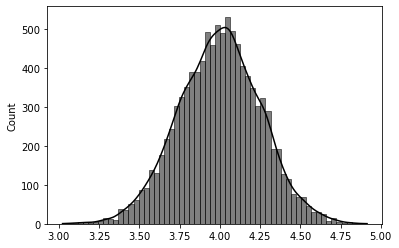

In [29]:
#확률밀도함수 구하기
sns.histplot(sample_mean_array,color='black', kde=True)
#표본평균 만개의 분포 히스토그램
#아래 그래프 면적 1
#평균 4, 표준편차 0.8인 정규분포

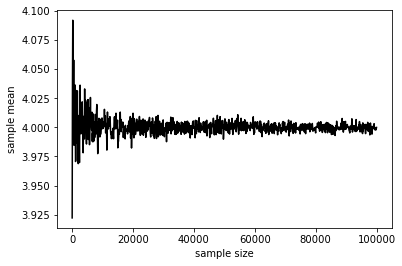

In [30]:
#샘플사이즈 변화( 많아질수록 표준편차가 작아진다, 평균으로 좁아진다. 
# -> 학습 추정) 
#그림으로 확인하기

#샘플사이즈변화에 따라 평균변화
#샘플사이즈를 변화시키면서 표본평균을 도출하는 시뮬레이션

#샘플사이즈변화
size_array = np.arange(10,100100,100)

np.random.seed(1)
sample_mean_array_size= np.zeros(len(size_array))  #빈 array 그릇 만들어주기!!!
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i]) #10개부터 100개씩 증가하는(100100-1까지) 정규분포 랜덤샘플
    sample_mean_array_size[i] = np.mean(sample) #샘플사이즈 10개 평균, 110개평균, 210개 평균...

#그림그리기    
plt.plot(size_array, sample_mean_array_size, color = 'black') 
#표본의 수가 증가함에따라 표본평균이 어떻게 변화하는지 그래프

plt.xlabel('sample size')  #표본 개수
plt.ylabel('sample mean')  #표본의 평균 (설정했던 평균 4)
plt.show()
#샘플사이즈가 커질수록 평균(4)으로 가까워지는 것을 확인할 수 있다.

### 3) 샘플사이즈(표본 개수)에 따른 평균비교
샘플 사이즈가 커질수록 표본평균이 모평균에 가까워지고 모평균으로 밀집도가 높아진다.

In [31]:
np.random.seed(1) #랜덤고정

#표본평균 계산하는 사용자함수 만들기.
def cal_sample_mean(norm, size, n_trial):  #사이즈, 표본개수
    sample_mean_array = np.zeros(n_trial)  #빈그릇 생성(표본의 수 만큼)
    for i in range(0,n_trial):  #그릇에 담기는 동안
        sample_mean_array[i] = norm.rvs(size = size).mean() #모집단의 랜덤표본 size개의 평균
    return sample_mean_array

population = stats.norm(loc=4,scale=0.8)  
#이 정규분포에 대해 표본개수에 따른 표본평균의 변화를 관찰.

# 샘플 사이즈가 10
size_10 = cal_sample_mean(population,10, 10000)
# 샘플 사이즈가 20
size_20 = cal_sample_mean(population,20, 10000)
# 샘플 사이즈가 30
size_30 = cal_sample_mean(population,30, 10000)

In [33]:
#표본개수에 따른 평균값들 가지고 df 만들기
df = pd.DataFrame([size_10,size_20,size_30],
                  index=['size_10_sample_mean','size_20_sample_mean',
                         'size_30_sample_mean'])
df.T.head(2)

,size_10_sample_mean,size_20_sample_mean,size_30_sample_mean
0,3.922287,4.021685,4.129223
1,3.864329,3.899744,3.772253


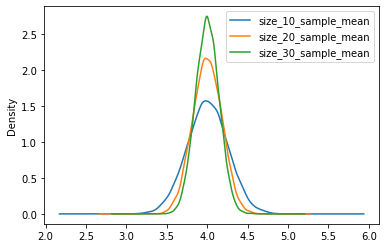

In [36]:
df.T.plot(kind='density')
plt.show() #표본수가 30이 가장 평균 4 에 가까운것을 확인할 수 있다.

<AxesSubplot:xlabel='size', ylabel='sample_mean'>

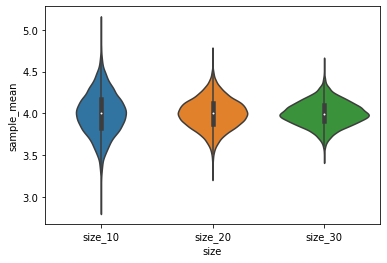

In [37]:
# 다른방법

# 표본샘플 사이즈가 10
size_10 = cal_sample_mean(population,10, 10000)
size_10_df = pd.DataFrame({'sample_mean':size_10,  #딕셔너리 키-값으로 df만들기
                          'size' : np.tile('size_10',10000)}) #np.tile(str,num) str을 num개 붙이라는 의미
# 표본샘플 사이즈가 20
size_20 = cal_sample_mean(population, 20, 10000)
size_20_df = pd.DataFrame({'sample_mean':size_20,
                          'size' : np.tile('size_20',10000)})
# 표본샘플 사이즈가 30
size_30 = cal_sample_mean(population, 30, 10000)
size_30_df = pd.DataFrame({'sample_mean':size_30,
                          'size' : np.tile('size_30',10000)})

#위 3개의 df 합치기
sim_result = pd.concat([size_10_df,size_20_df,size_30_df], ignore_index=True) #행방향 합치기
sim_result.head() #3만개


# 바이올린 플롯을 그리고, 3개 그룹에 대한 인사이트를 기술하세요.
sns.violinplot(x='size', y='sample_mean',data=sim_result)
#분포와 밀집도를 둘다 알 수 있음.

- 추출횟수가 같더라도, 표본샘플의 사이즈가 커질수록 모평균으로 밀집도가 높아지는 것을 알 수 있다.
- 추출횟수가 같더라도, 표본샘플의 사이즈가 커질수록 표준편차가 작아지는 것을 확인할 수 있다.       
샘플사이즈에 의미가 특별하다.

[다른분들의 인사이트]       
- 세 분포 모두 평균 4.0을 중심으로 종모양의 분포 형태를 갖는다. 
- size=10일때는 size=20,30일때보다 분포가 넓게 퍼져있고, 
- 샘플사이즈가 커질수록 분포가 평균값에 몰려있다는 것을 확인할 수 있다. 
- 즉, 샘플사이즈가 클수록 표본에서 구한 평균이 모평균과 가까운 값일 확률이 높아진다는 의미이다.

- 추출횟수가 같더라도 샘플의 사이즈가 커질수록 표본평균이 모평균에 근사함
- 추출횟수가 같더라도 샘플의 사이즈가 커질수록 표준편차가 작아짐

1. 샘플 사이즈가 커질수록 표본평균에 근접한 값의 밀도가 높아짐.
2. 즉 샘플 사이즈가 커질수록 표본평균이 모평균에 가까워짐.
3. 샘플 사이즈의 크기가 중요해진다.

### 4) 샘플사이즈(표본 개수)에 따른 표준편차의 변화
키워드 : 표본평균의 표준편차, 표준오차

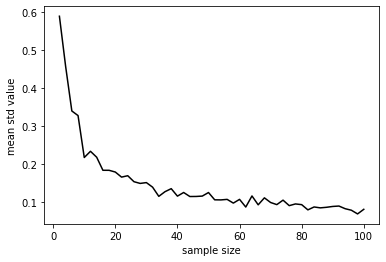

In [39]:
#샘플사이즈가 커짐
size_array = np.arange(2,102,2)
#표본평균의 표준편차를 저장할 배열(그릇)
sample_mean_std_array = np.zeros(len(size_array))   

#시뮬레이션 : 샘플사이즈가 커질수록 표본평균의 표준편차가 작아짐.
for i in range(len(size_array)):
    sample_mean = cal_sample_mean(population, size=size_array[i],n_trial=100)  
    #101까지 2씩 증가하는 array -> 샘플 2씩 증가 #n_trial = 표본개수 100개 고정
    sample_mean_std_array[i] = np.std(sample_mean, ddof=1)
plt.plot(size_array, sample_mean_std_array,color='black')
plt.xlabel('sample size')
plt.ylabel('mean std value')  
plt.show() #샘플사이즈가 커짐에 따라서 표본평균의 표준편차가 줄어드는 것을 확인할 수 있다.

Text(0, 0.5, 'mean std value')

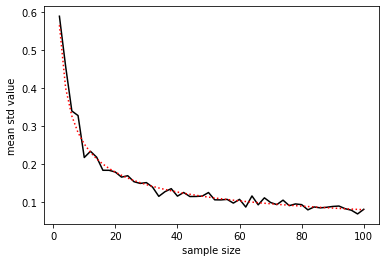

In [40]:
# 표준오차 : 표본평균과 모평균과의 표준적인 차이,
#(샘플사이즈가 커지면 표본평균이 모평균에 근사해지니까 차이는 작아짐)
standard_error = 0.8/np.sqrt(size_array) #(모집단의 표준편차)/(루트 샘플사이즈)

#시뮬레이션 결과(표준평균의 표준편차)와 표준오차간 비교
plt.plot(size_array, sample_mean_std_array,color='black')
plt.plot(size_array, standard_error,color='red', linestyle='dotted')
plt.xlabel('sample size')
plt.ylabel('mean std value')

#거의 일치
#표본평균의 표준편차로 표준오차를 쓰기도 한다.

### 5) 정규분포의 함수
확률밀도함수(pdf), 누적분포함수(cdf), 누적분포함수의 역함수(ppf)

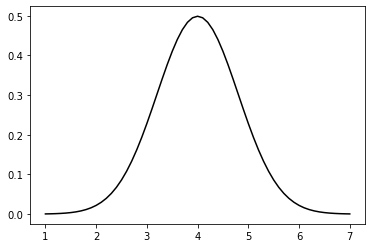

In [42]:
#확률밀도함수(pdf, probability density function)
stats.norm.pdf(loc= 평균, scale=표준편차, x = 배열이나 숫자)

#확률밀도함수 그래프
x_plot = np.arange(1,7.1,0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot,loc=4,scale=0.8),color='black')
plt.show()

In [43]:
norm_dist = stats.norm(loc=4,scale=0.8) #정규분포
norm_dist.pdf(x=4) #정규분포의 확률밀도함수에서 x가 4일때의 값 출력

0.49867785050179086

In [44]:
#누적분포함수 (cdf, cumulative distribution function)
stats.norm.cdf(loc=4,scale=0.8,x=7)  #정규분포의 누적분포함수에서 x가 7일때의 값 출력

0.9999115827147992

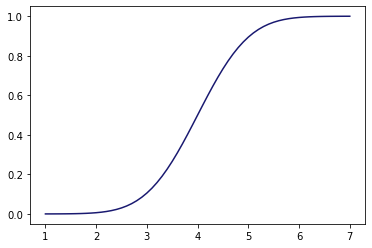

In [45]:
x_plot = np.arange(1,7.1,0.1)
plt.plot(x_plot,stats.norm.cdf(x=x_plot,loc=4,scale=0.8),color='midnightblue')
plt.show()

In [46]:
stats.norm.cdf(loc=4,scale=0.8,x=4) #평균값은 딱 중간(0.5)에 있다.

0.5

In [47]:
# 누적분포함수의 역함수(inverse cumulative distribution function) ppf
# 퍼센트 포인트 - 하측확률 대응됨
# 하측확률 q 에 해당되는 퍼센트포인트(x값) 구할 때 이용
stats.norm.ppf(loc=4,scale=0.8,q=0.5) #하측확률이 q=0.5 일 x값(= 퍼센트포인트)

4.0

In [48]:
#하측확률 구할때, x= (퍼센트포인트) 이용
stats.norm.cdf(loc=4,scale=0.8, x=4) #하측확률은? 0.5(분위수퍼센트)

0.5

### 6) t 분포
stats.**t**.pdf(x=x,df=5)  
-  자유도가 5인 t 분포의 확률밀도함수

In [50]:
#t 값의 표본분포
np.random.seed(1)
t_value_array = np.zeros(10000) #빈그릇

norm_dist = stats.norm(loc=4, scale=0.8) #정규분포

for i in range(0,10000):
    sample = norm_dist.rvs(size=10)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample,ddof=1)
    sample_se = sample_std/np.sqrt(len(sample))  
    #se: 표준오차(모평균과 표본 차이)  
    #se = 랜덤표본의 표준편차(표본평균과 모평균의 차이)/루트 샘플수
    t_value_array[i] = (sample_mean - 4)/sample_se  
    #t값 = (표본평균 - (4 : 모평균))/표준오차
    # => 크다 : 표준오차 작다, 작다 :표준오차 크다

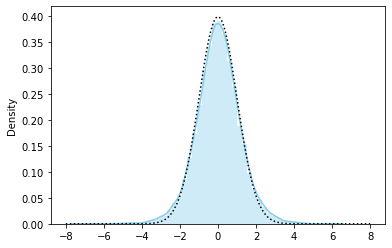

In [63]:
# t분포
sns.distplot(t_value_array, color = 'skyblue', kde=True)

#표준정규분포의 확률밀도 stats.norm.pdf()
x = np.arange(-8,8.1,0.1)
plt.plot(x, stats.norm.pdf(x=x),
        color = 'black', linestyle='dotted') #점선
plt.show()
#하늘색 t분포는 점선인 정규분포보다 살짝 넓게 퍼져있다.

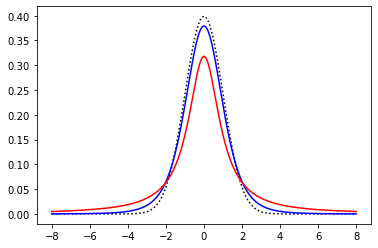

In [65]:
# 자유도 n 이 커짐에 따라 표준정규분포 N(0,1)에 수렴
plt.plot(x, stats.norm.pdf(x=x),
         color = 'black', linestyle = 'dotted') 
plt.plot(x, stats.t.pdf(x=x,df=5),  #자유도가 5인 t분포
        color = 'blue')
plt.plot(x, stats.t.pdf(x=x, df=1),  #자유도가 1인 t분포
        color= 'red')
plt.show()
#자유도가 커질수록 표준정규분포에 근사한다.

### 7) 신뢰구간
신뢰구간계산 : 신뢰구간이란 특정 신뢰계수를 만족하는 구간        
**(표본평균-모평균 ;=표준편차)/표준오차**로 계산한 t값. 

In [67]:
df = pd.read_csv('dataset/5_7_fl.csv')
fish = df['length']  #시리즈로 가져오기
# 모평균의 점추정
mu = np.mean(fish)
# 모분산의 점추정
sigma_2 = np.var(fish, ddof=1) #ddof=1 불편추정량의 성질을 만족하기 위함

In [68]:
# 표준편차
sigma = np.std(fish, ddof=1)
#표준오차
se = (sigma)/np.sqrt(len(fish)) #표준평균과 모평균의 차이 = 표준편차/루트 개수
#자유도 degree of freedom
df = len(fish) -1

In [69]:
#신뢰구간 stats.t.interval
Interval = stats.t.interval(alpha = 0.95, df=df, loc=mu, scale=se) 
#alpha = 신뢰수준, df=자유도, loc = 평균, scale = 표준오차(t분포여서)
Interval #신뢰구간의 (하한가, 상한가)
#(3.5970100568358245 ~ 4.777068592173221) 이 신뢰구간이다.

(3.5970100568358245, 4.777068592173221)

In [70]:
# 샘플사이즈를 10배로 늘려서 신뢰구간 계산 - 신뢰구간 줄어듬
df_10 = (len(fish*10)) -1
se_10 = (sigma)/np.sqrt(len(fish)*10)
stats.t.interval(alpha=0.95, df=df_10, loc=mu, scale=se_10)

# 신뢰계수가 커질수록 신뢰구간의 폭이 넓어지고 안전해진다고 볼 수 있음.

(4.0004556873051, 4.373622961703947)

-------------
## 2. stat2

### 1) 가설검정 - 귀무가설, t-검정
- 대응표본 t-검정
- 독립표본 t-검정

In [71]:
# t검정 : 귀무가설 _ 과자의 무게는 50g 이다.
junk_food = pd.read_csv('dataset/5_8_jfw.csv')
#표본평균 뽑기
jfood = junk_food.weight.copy()
mu = np.mean(jfood)
# 자유도
df = len(jfood)-1
# 표준편차
sigma = np.std(jfood, ddof=1)
# 표준오차
se = sigma/np.sqrt(len(jfood))

In [73]:
# t 값
t_value = (mu-50)/se
t_value

2.7503396831713434

In [74]:
# p값(유의확률)을 구해서 p값이 유의수준 0.05보다 작으면 귀무가설 기각
# t 분포의 누적밀도함수(cdf) , x = t 값, df = 자유도
alpha = stats.t.cdf(t_value,df=df)
alpha #p값은 양쪽끝에 있음. #양측검정이니까 *2 필요

0.9936372049937379

In [75]:
(1-alpha)*2  #0.05보다 작다 -> 귀무가설 기각, 대립가설 채택

0.012725590012524268

[대응표본 t검정]

In [77]:
# 대응표본(약을 먹기 전과 후의 체온의 차이)
paired_test_data = pd.read_csv('dataset/5_9_ptt.csv')
ptdata = paired_test_data.copy()
ptdata.head(2)
# 귀무가설 : 약을 먹기 전고 후의 체온에 차이가 없다. 

,person,medicine,body_temperature
0,A,before,36.2
1,B,before,36.2


In [79]:
# 대응표본 t검정
# 데이터 전처리, 쿼리 이용하여 before 와 after을 구분하기
before = ptdata.query('medicine=="before"')['body_temperature']
after = ptdata.query('medicine=="after"')['body_temperature']
#배열로 변환
before = np.array(before)
after = np.array(after)
# 차이구하기
diff = after - before 

In [80]:
# 차이가 평균값이 0과 다른지 검정
stats.ttest_1samp(diff,0)
# t검정 귀무가설에서 p값이 0.05보다 작으니 귀무가설 기각, 대립가설 채택됨
# 약을 먹기 전고 후의 체온에 유의미한 차이가 있다고 주장할 수 있다.

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

[독립표본 t검정]

In [84]:
# 독립표본으로 각각의 표본 평균 구해줌
mean_bf = np.mean(before)
mean_af = np.mean(after)
#분산
sigma_bf = np.var(before, ddof=1)
sigma_af = np.var(after, ddof=1)
#샘플사이즈
m = len(before)
n = len(after)
# t값
t_value = (mean_af-mean_bf)/np.sqrt((sigma_bf/m + sigma_af/n))
t_value # == Ttest_indResult의 statistic = 3.1557282344421034

3.1557282344421034

In [83]:
stats.ttest_ind(after,before,equal_var=False) 
# equal_val : 분산이 같다, 다르다를 가정한 t검정(다르다_False -> welch 검정)
# 독립표본 indepandent
# p값이 0.05보다 작다-> 귀무가설 기각(우연아님) 
# 귀무가설을 기각하고 유의미한 차이가 있다고 판단
# -> after, before 유의미한 차이가 잇다고 주장할 수 있음.

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013484775682079892)

### 2) 카이제곱검정(x² 카이스퀘어검정)
- **독립성 검정**의 분할표 및 가설 설정
- 귀무가설 : 두 범주형 변수 사이에 연관이 없다.(독립이다.)
- 대립가설 : 두 범주형 변수 사이에 연관이 있다.(종속이다.)

stats.**chi2_contingency**(분할표, correction = False)

In [86]:
# 분할표
click_data = pd.read_csv('dataset/5_10_cd.csv')
cross = pd.pivot_table(data=click_data, values = 'freq', 
                       aggfunc='sum',index='color',columns='click')
cross
#색이 클릭과 독립성이 있는지 분석 _ 독립성 분석
# 카이스퀘어 통계량으로 t값을 구함.

click,click,not
color,,
blue,20,230
red,10,40


In [87]:
# 카이스퀘어 통계량 , p값, 자유도, 기대도수표 출력
stats.chi2_contingency(cross, correction = False)

(6.666666666666666,
 0.009823274507519247,
 1,
 array([[ 25., 225.],
        [  5.,  45.]]))

correction = False 파라미터 보정 안함.      
카이스퀘어 검정 시 기대도수가 전부 5 이상이어야 함.      
p값 0.05보다 작으므로 귀무가설(색에 따라 클릭버튼 관계 없음) 기각       
색에 따라 버튼을 클릭하는 것이 유의미하게 변한다고 판단. -> 독립성 없음.      

### 3) 수리모델 : 현상을 수식으로 표현한 모델. 
맥주 매상 = 20 + 4 * 기온

[모델]       
lm_model = smf.**ols** (formula= , data= )       
lm_model.fit() : 모델 학습시키는 문법.         
OLS Regression Results 이해하기.

Q-Q플롯 

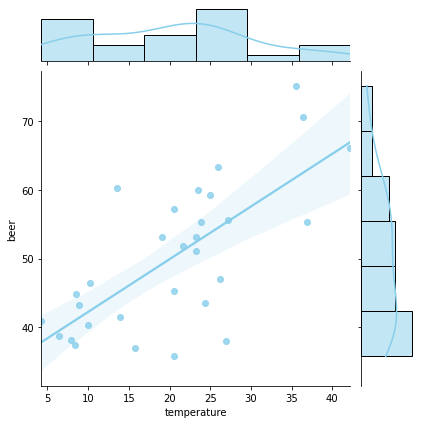

In [88]:
beer = pd.read_csv('dataset/7_1_beer.csv')
sns.jointplot(x=beer.temperature, y=beer.beer, kind='reg',
             color='skyblue')
plt.show() # 온도가 올라감에 따라 beer 가 올라감

In [93]:
#모델구축
lm_model = smf.ols(formula="beer ~ temperature",
                  data = beer).fit()  #fit 은 학습시킴
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           1.11e-05
Time:                        17:45:55   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

=> 해석 : 기온이 맥주 매상에 영향을 미친다는 것을 알 수 있음     
https://blog.naver.com/ehdanf1219 항목의 자세한 설명 참고.

In [94]:
# 기온이 0도일 때 맥주 매상의 기댓값
# 방법1
lm_model.predict(pd.DataFrame({'temperature':[0]}))

# 방법2
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 0
beta0 + (beta1 * temperature)  #y = a(기울기)x + b(편차)

34.610215255741466

In [95]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [ ]:
# 잔차계산
# 방법1
resid = lm_model.resid

#방법2
# 잔차 = 실제값 - 예측값
y_hat = beta0 + (beta1 * beer.temperature) # -> 예측값
beer.beer - y_hat  # 실제값 - 예측값

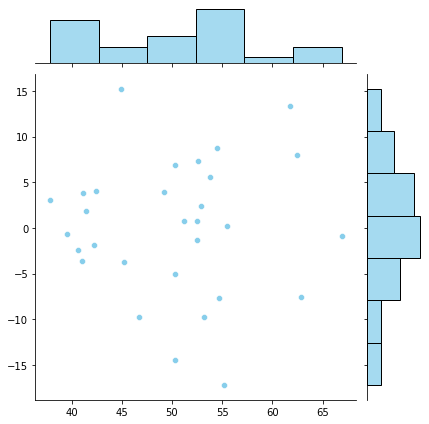

In [99]:
# 잔차의 산포도 : x축 적합도(fittedvalues), y축 잔차(resid)
sns.jointplot(lm_model.fittedvalues,lm_model.resid, color = 'skyblue') #아래 모양 잘 되어있음.
plt.show()
# 잔차 플롯의 패턴 또는 절대 값이 큰 잔차는 회귀모형에 문제가 있음을 나타낸다.
# 패턴없는게 문제 없음.

In [100]:
# 결정계수 R-squared
# Regression model의 성능을 측정하기 위해 mean value로 예측하는 단순 모델(Zero-R 모델)과
# 비교하여 상대적으로 얼마나 성능이 나오는지를 측정한 지표.
mu = np.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()

# np.sum((yhat-mu)**2) 모듈에의한 변화, 
# np.sum((y-mu)**2)전체변화 -> 모델이 전체를 설명할 수 있는 정도 (설명력)
np.sum((yhat-mu)**2)/np.sum((y-mu)**2)

0.503959323061188

In [104]:
# 수정결정계수 : 독립변수의 수가 늘어나면 
# 결정계수가 커지는 경향을 조정하기 위하여 
# 독립변수가 늘어나는 것에 대하여 패널티 부여
#방법1
n = len(beer.beer)
s = 1 # 독립변수의 개수
1 - ((np.sum(resid**2))/(n-s-1))/(np.sum((y-mu)**2)/(n-1))

# 방법2
lm_model.rsquared_adj

0.4862435845990851

In [105]:
# 종속변수의 변동 크기는 모델로 설명 가능한 변동과 설명 못하는 
# 잔차제곱합으로 분해할 수 있다.

# 종속변수의 변동
# 방법1
np.sum((y-mu)**2)

# 방법2
# np.sum((yhat-mu)**2)  모델이 설명하는 크기, 
# sum(resid**2) 잔차제곱합(모델이 설명하지 못하는)
np.sum((yhat-mu)**2) + sum(resid**2)

3277.1146666666727

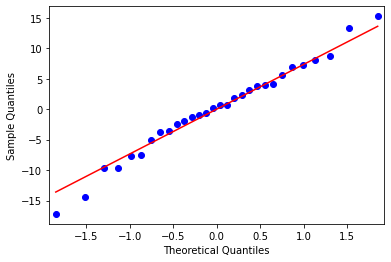

In [106]:
# Q-Q플롯 : 이론상의 분위점과 실제 데이터의 분위점(1,2,3,4분위)을 산포도 그래프로 그린 것.
import statsmodels.api as sm
fig = sm.qqplot(resid, line='s')

### 4) 분산분석
[분산분석 모델]      
anova_model = smf.ols('beer~weather', data = w_beer).fit()        
sm.stats.**anova_lm**(anova_model,typ=2)        

In [107]:
# 샘플데이터
weather = [
    "cloudy","cloudy",
    "rainy","rainy",
    "sunny","sunny"
]
beer = [6,8,2,4,10,12]
w_beer = pd.DataFrame({"beer":beer,
                      "weather" : weather})

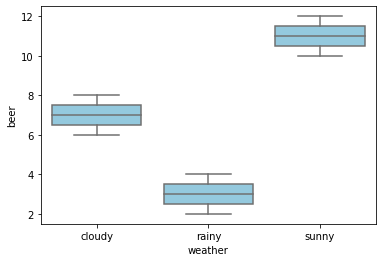

In [109]:
# 날씨에 따른 맥주판매
sns.boxplot(w_beer.weather,w_beer.beer, color ='skyblue') #군간변동이 있는것을 확인할 수 있다.
plt.show()

In [ ]:
# 날씨별 매상의 평균치
w_beer.groupby('weather').mean()

In [110]:
# 날씨에 의한 영향 : 2일씩 6일에 대한 날씨별 매상의 평균치
effect = [7,7,3,3,11,11] #각 군의 평균을 넣어줌, 오차를 빼버림. 

# 군간변동 구하기
# 군간변동 => effect의 흩어진 정도
# effect의 흩어진 정도를 구함으로써 군간변동을 구할 수 있음.
mu_effect = np.mean(effect)
sq_model = np.sum((effect-mu_effect)**2)
sq_model

64.0

In [111]:
# 오차(Error(Residual = 잔차))는 beer 와 평균과의 차이
resid = w_beer.beer - effect

# 군내변동: 오차 제곱의 합. 오차의 평균값은 0
sq_resid = np.sum(resid**2)

# 자유도 구하기
df_model = 2 # 군간변동의 자유도(수준의 종류 수에 따라 좌우됨 : 수준(3) - 1)
df_resid = 3 # 군내변동의 자유도(샘플사이즈와 수준의 종류 수 : 샘플(6) - 수준(3))

# 군간 평균 제곱(분산)
v_model = sq_model/df_model

# 군내 평균 제곱(분산)
v_resid = sq_resid/df_resid

# F비를 구할 수 있다.
# F비는 군간분산과 군내분산의 비
f_ratio = v_model/v_resid
f_ratio

16.0

In [112]:
# p값 구하기
1- stats.f.cdf(x=f_ratio, dfn=df_model, dfd = df_resid) 

0.02509457330439091

In [ ]:
# p값  - 0.05보다 작아 귀무가설 기각.-> 우연이 아니고 
# 날씨에 의해 맥주매상이 유의미하게 변화한다고 판단할 수 있다.

In [113]:
# 날씨에 따른 맥주판매, 분산분석 모델
anova_model = smf.ols('beer~weather',
                     data = w_beer).fit()  #아노바모델만들어줌
sm.stats.anova_lm(anova_model,typ=2) #분산분석표 : 군간, 군내편차제곱합, 자유도, F비, p값

,sum_sq,df,F,PR(>F)
weather,64.0,2.0,16.0,0.025095
Residual,6.0,3.0,NaN,NaN


In [114]:
anova_model.params  #파라미터값, 변수들의 회귀계수들

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

### 5) 독립변수가 여럿인 모델


> 독립변수가 여러개 일 때, 분산분석이 필요한 이유,       
> 검정을 이용하여 모델 선택하는 방법

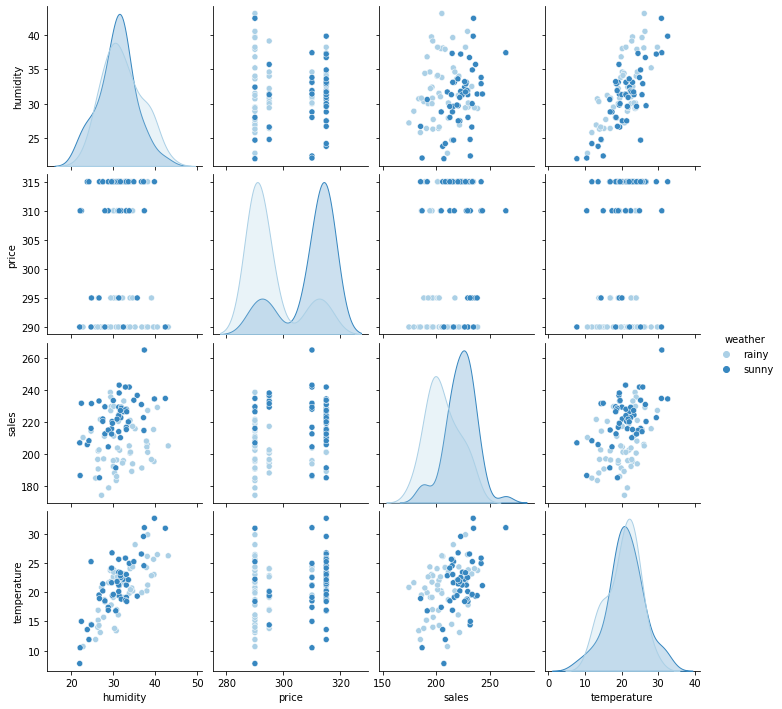

In [115]:
sales = pd.read_csv('dataset/7_3_lmm.csv')
# pairplot 그려보기
sns.pairplot(data = sales, hue = 'weather', palette = 'Blues')

In [116]:
lm = smf.ols('sales ~ price', data = sales).fit()
lm.params #sales가 price와 양의상관관계라고 나옴. 그래프에서는 잘 안보임.

Intercept    113.645406
price          0.332812
dtype: float64

In [117]:
# 분산분석표 보기
sm.stats.anova_lm(lm, typ=2)
# p값이 0.05보다 작아서 유의미하다고 나옴.
# 잘못된 분석으로 보임, 가격이 오르면 매상도 증가한다.

,sum_sq,df,F,PR(>F)
price,1398.392322,1.0,4.970685,0.028064
Residual,27570.133578,98.0,NaN,NaN


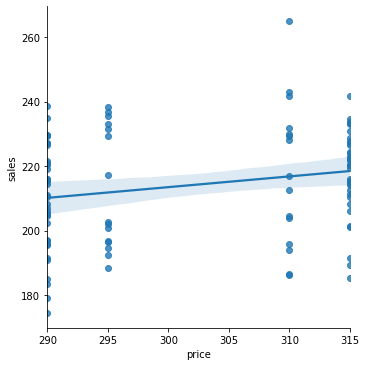

In [119]:
# 매상을 상품가격만으로 분석하여 문제의 소지 발생.
# 그림을 그려서 원인 발견, 다른변수 무시, 가격과 매상만 비교하는 그림
sns.lmplot(x='price', y='sales',data = sales, palette='gray')
plt.show()

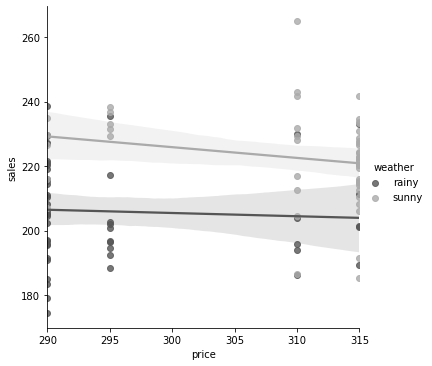

In [121]:
# weather을 넣으니 그래프 변화 있음.
# 변수선택의 중요성이 보여짐
sns.lmplot(x='price', y='sales',data = sales, hue='weather', palette='gray')
plt.show()

In [122]:
sales.groupby('weather').mean()
# rainy, sunny의 sales 차이가 보임.
# 매상을 가격만으로 분석하면 문제의 소지가 발생
# 날씨별로 보면 가격이 높아질 경우 매상이 줄어든다는 것을 알 수 있음.

,humidity,price,sales,temperature
weather,,,,
rainy,32.126,295.5,205.924,20.422
sunny,30.852,309.5,222.718,21.102


In [123]:
#독립변수가 4개인 모델 추정
lm_sales = smf.ols(
"sales ~ weather+humidity+temperature+price", data = sales).fit()
lm_sales.params
# 교차효과가 없다고 가정하고 +  // 교차효과가 있다고 가정하면 * 사용해야 함.
# 위에서와는 다르게 price의 기울기 음수로 나옴.
# 2개 이원분산, 3개부터 다원분산분석.

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

In [124]:
#분산분석표
sm.stats.anova_lm(lm_sales).round(3) #소수점이 많아서 반올림처리

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
humidity,1.0,1779.601,1779.601,9.805,0.002
temperature,1.0,2076.845,2076.845,11.443,0.001
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


=> 모든 독립변수가 유의미하다고 도출되어 '잘못된 검정 결과'라 의심됨

- F검정(분산분석) 대신 회귀계수의 T검정을 수행하면 문제는 발생되지 않음,     
- 그러나 검정 다중성의 문제가 발생할 수 있음     
         

[검정 다중성의 문제]      
: 귀무가설이 기각되기 쉬어지고 1종오류가 발생할 가능성이 커짐.      
- "다중성은 여러 개의 검정을 동시에 실시함에 따라 그 중에 하나라도 우연히 기각할 확률이 점차 늘어남을 의미한다(김권현, 193)."     
- 귀무가설이 과소평가되는 것 - > 귀무가설이 참인데 기각되는 오류(1종오류)      
- 그래서 분산분석을 이용하여 한번에 분석.      

In [126]:
lm_sales.summary().tables[1]
# humidity t검정의 p값 0.578, 0.05이상으로 귀무가설 채택 유의미하지 않음.
# 하지만 검색 다중성의 문제가 있음.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [128]:
lm_sales2 = smf.ols(
"sales ~ weather+temperature+humidity+price", data = sales).fit()
sm.stats.anova_lm(lm_sales2).round(3)
# humidity, temperature 순서를 바꿨더니 humidity의 p값이 0.05보다 큼.
# 유의미한 변수 3개로 바뀜.- > 뭔가 잘못됨을 감지할 수 있음.

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
temperature,1.0,3814.779,3814.779,21.018,0.000
humidity,1.0,41.667,41.667,0.230,0.633
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


In [129]:
lm_sales2.summary().tables[1]  
#t검정 결과 값이 humidity, temperature 순서를 바꾸기 전과 같음을 알 수 있음.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


**위의 검정에서 주요 문제 ; 검색다중성의 문제**

In [130]:
# 그래서 Type 2 ANOVA 사용
# 모든 변수가 포함된 
mod_full = smf.ols(
"sales ~ weather+humidity+temperature+price", sales).fit()
sm.stats.anova_lm(mod_full, typ=2).round(3)
# F검정의 p값이 T검정 p값과 같은 결과로 나옴.

,sum_sq,df,F,PR(>F)
weather,5845.878,1.0,32.208,0.000
humidity,56.425,1.0,0.311,0.578
temperature,2378.017,1.0,13.102,0.000
price,818.402,1.0,4.509,0.036
Residual,17242.717,95.0,NaN,NaN


In [131]:
#유의미하지 않은 변수(humidity) 제거
mod_non_humi = smf.ols(
"sales ~ weather+temperature+price", sales).fit()
sm.stats.anova_lm(mod_non_humi, typ=2).round(3)

,sum_sq,df,F,PR(>F)
weather,6354.966,1.0,35.266,0.000
temperature,4254.736,1.0,23.611,0.000
price,803.644,1.0,4.460,0.037
Residual,17299.142,96.0,NaN,NaN


In [ ]:
# 습도는 기온과 강한 상관관계가 있으며 기온이라는 독립변수가 포함되어 있으면
# 습도는 매상에 영향을 끼친다고 볼 수 없음.

**문제 해결 :     
※ 독립변수 여러개일 때 Type 2 ANOVA 모델 선택.**

**독립변수가 여러개일 때는 아노바(F검정이용하는, Type 2 ANOVA)이용**
- t검정일 때는 검색 다중의 문제가 발생

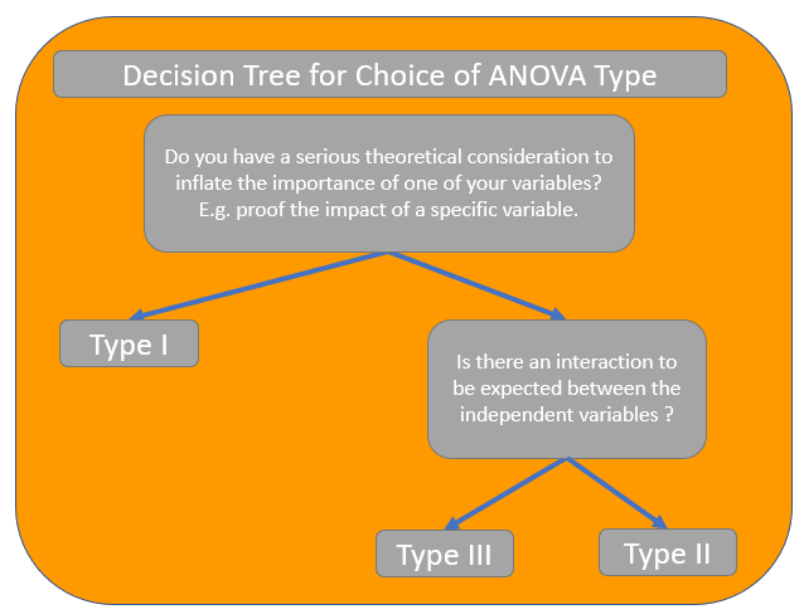

### 6) 독립변수들간의 교우작용
- 결과에서 교우관계를 확인한 결과(2가지가 종속변수에 미치는 영향) 독립변수들끼리 p값이 0.05미만인 것은 확인되지 않는다.
- 이원분산분석 부터는 교우작용도 따져줘야한다.
- 시험문제에 아노바분석은 * 로, 교우작용이 유의미한지 확인해줘야 한다.

In [132]:
# 변수간의 교우작용 확인
mod_non_humi = smf.ols(
"sales ~ weather*temperature*price", sales).fit()
sm.stats.anova_lm(mod_non_humi, typ=2).round(3)

,sum_sq,df,F,PR(>F)
weather,6425.428,1.0,36.086,0.000
temperature,4278.061,1.0,24.026,0.000
weather:temperature,71.995,1.0,0.404,0.526
price,803.336,1.0,4.512,0.036
weather:price,96.890,1.0,0.544,0.463
temperature:price,390.204,1.0,2.191,0.142
weather:temperature:price,357.056,1.0,2.005,0.160
Residual,16381.404,92.0,NaN,NaN


---------------------------

## 3. stat 과제

[과제]    
Q. 'dataset/5_2_shoes.csv' 을 데이터프레임으로 불러와서 아래 작업을 수행하세요.
- 4행 3열을 복사하여 수직으로 결합하여 8행 3열의 데이터프레임 만드세요.
- 교차분석표를 만드세요.(values='sales',aggfunc='sum',index='store',columns='color')
- 독립성 검정을 수행하세요.

In [135]:
shoes = pd.read_csv('dataset/5_2_shoes.csv')
shoes2 = shoes.copy()
shoes = pd.concat([shoes,shoes2])
shoes.head(3)

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13


In [136]:
shoes_cross = pd.pivot_table(data = shoes, values='sales',
                             aggfunc='sum',index='store',columns='color')
shoes_cross

color,blue,red
store,,
osaka,26,18
tokyo,20,30


In [137]:
# 독립성 검정 -> 카이제곱검정(chi2_contingency)

stats.chi2_contingency(shoes_cross, correction = False)

(3.413537549407115,
 0.06466368573255789,
 1,
 array([[21.53191489, 22.46808511],
        [24.46808511, 25.53191489]]))

In [ ]:
#통계량 3.413537549407115,
#p값 0.06466368573255789,
#자유도 1,
#기대도수표  [[21.53191489, 22.46808511],
#            [24.46808511, 25.53191489]]))

[과제]    
Q. lm_model 선형모델을 생성하고 summary 를 출력한 후 모델에 대해 해석하세요.

In [140]:
df = pd.read_csv('C:\workspace\cakd3\programming\dataset/auto-mpg.csv')
df_mw = df[['mpg', 'weight']]
df_mw.head(3)

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436


In [139]:
# 선형모델을 생성(smf.ols)
df_lm_model = smf.ols(formula="mpg ~ weight",
                  data = df).fit()
# summary 를 출력
df_lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Wed, 18 Aug 2021   Prob (F-statistic):          2.97e-103
Time:                        18:49:07   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[모델해석]
       
Dep. Variable: mpg - **종속변수 : mpg**      
Model:OLS	- 최소자승법(OLS: Ordinary Least Squares), 잔차(Residual) 제곱의 합을 최소로 하는 방법이 최소자승법이며, 최소자승법을 활용하여 데이터를 가장 잘 표현하는 선형 회귀선을 그릴 수 있다. (근사적으로 구하려는 해와 실제 해의 오차의 제곱의 합이 최소가 되는 해를 구하는 방법)         
        
Method:	Least Squares - 최소자승근사법(method of least squares)        
No. Observations:398	- Number of observations, 관찰표본 수, 즉 총 표본 수 Df Residuals:396	 - DF는 Degree of Freedom으로 자유도를 뜻하는데, DF Residuals는 전체 표본 수에서 측정되는 변수들(종속변수 및 독립변수)의 개수를 빼서 구한다.        
        
Df Model:1 - **독립변수의 개수가 한개**        
Covariance Type:nonrobust -  공분산 타입. 특별히 지정하지 않으면 onrobust가 됨        
        
R-squared:0.692 - 결정계수, 모델 설명력, **mpg의 분산이 weight를 약 69%를 설명한다.** 1이면 모델이 완벽하게 데이터를 100% 설명해주는 상태이다.     
Adj. R-squared:	0.691 - 독립변수의 개수와 표본의 크기를 고려하여 R-squared를 보정한 값.     
- 종속 변인과 독립변인 사이에 상관관계가 높을수록 1에 가까워진다.     
- 결정계수는 전체 변동폭의 크기에 대한 모델로 설명 가능한 변동폭의 비율이라고 할 수 있음
      
      
      
F-statistic:888.9 - F통계량, 검정 통계량이 귀무 가설 하에서 F- 분포를 갖는 통계 검정      
Prob (F-statistic):	2.97e-103 - 회귀모형에 대한 (통계적) 유의미성 검증 결과, 유의미함 (p < 0.05)     
**p값이 0.05보다 작으므로 귀무가설 기각됨, mpg가 weight와 유의미하다고 판단할 수 있음.**

      
Log-Likelihood:	-1148.4 - 최대로그우도, 특정 사건이 일어날 가능성을 비교할 수는 없을까?: 가능도(Likelihood)           
- 연속 사건: 가능도 ≠ 확률, 가능도 = PDF값
- 셀 수 있는 사건(이산사건): 가능도 = 확률  
- 확률변수의 표집값과 일관되는 정도를 나타내는 값.(주어진 표집값에 대한 모수의 가능도는 이 모수를 따르는 분포가 주어진 관측값에 대하여 부여하는 확률이다.)          

AIC:2301, BIC:2309 - AIC, BIC: 로그우도를 독립변수의 수로 보정한 값 (작을 수록 좋다)        
     
Intercept.coef : 46.3174  - 절편값     
weight.coef : 	-0.0077	 -"weight"의 회귀계수. 즉, 기울기     
     
**y = -0.0077\*x + 46.3174**     
     
P>|t|  0 : **0.05보다 작기 때문에 유의하다고 판단할 수 있다.**    
     
Skew(왜도): 0.713 - 데이터가 치우친것을 의미함.      
- 오른쪽으로 치우침 = 왜도 < 0
- 왼쪽으로 치우침 = 왜도 > 0

**왜도가 0보다 크기 때문에 왼쪽으로 데이터가 치우친 것을 알 수 있다.**  

Kurtosis(첨도): 4.176 -  자료 분포가 뾰족한 정도를 나타내는 척도      
- 정규분포 = 첨도 0 (Pearson 첨도 = 3)
- 위로 뾰족함 = 첨도 > 0 (Pearson 첨도 >3)
- 아래로 뾰족함 = 첨도 < 0 (Pearson 첨도 < 3)
     
**첨도가 3보다 크기 때문에 위로 뾰족한 분포인것을 알 수 있다.**     

Durbin-Watson:	0.797 - 시계열데이터일때 체크 필수!
- 잔차의 자기상관을 체크하는 지표.
- 보통 1.5 ~ 2.5사이이면 독립으로 판단하고 회귀모형이 적합하다는 것을 의미
- 시계열데이터를 분석하는 경우 반드시 이 지표를 체크. 잔차에 자기상관이 있으면 계수의 t검정 결과 신뢰 못함
- Durbin-Watson 통계량이 2보다 크거나 차이가 난다면 일반화 제곱법 등의 사용 검토 필요

**[도전 과제]**       
FIFA 데이터는 가상의 온라인 축구게임에 등장하는 축구 선수의 주요 특징과 신체 정보에 대한 데이터이다.     
변수는 'ID', 'Name', 'Age', 'Nationality', 'Overall', 'Club', 'Preferred_Foot', 'Work_Rate', 'Position', 'Jersey_Number', 'Contract_Valid_Until','Height', 'Weight_lb', 'Release_Clause', 'Value', 'Wage'와 같다.

In [142]:
fifa = pd.read_csv('C:\workspace\cakd3\programming\dataset/FIFA.csv')
fifa.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Club', 'Preferred_Foot',
       'Work_Rate', 'Position', 'Jersey_Number', 'Contract_Valid_Until',
       'Height', 'Weight_lb', 'Release_Clause', 'Value', 'Wage'],
      dtype='object')

Q1. FIFA데이터에서 각 선수의 키는 Heghit변수에 피트와 인치로 입력되어 있습니다. 이를 cm로 변환하여 새로운 변수 Height_cm을 생성하시오. ( “ ' ” 앞의 숫자는 피트이며, “ ' ” 뒤의 숫자는 인치, 1피트 = 30cm, 1인치 = 2.5cm)

In [143]:
cm = fifa['Height'].str.split('\'', expand=True)
cm[[0, 1]] = cm[[0, 1]].astype(int)
cm['cm'] = cm[0] * 30+ cm[1]* 2.5
fifa['Height_cm'] = cm['cm']

In [144]:
fifa.Height_cm.head()

0    167.5
1    185.0
2    172.5
3    190.0
4    177.5
Name: Height_cm, dtype: float64

 Q2. 포지션을 의미하는 Position변수를 아래 표를 참고하여 “Forward”, “Midfielder”,“Defender”, “GoalKeeper”로 재범주화하고, 변환하여 Position_Class 라는 변수를 생성하고 저장하시오.

Forward : ['LS','ST','RS','LW','LF','CF','RF','RW']       
Midfielder : ['LAM','CAM','RAM','LM','LCM','CM','RCM','RM']      
Defender : ['LBW','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']      
GoalKeeper 

In [145]:
def position(x):
    if x in ['LS','ST','RS','LW','LF','CF','RF','RW']:
        return 'Forward'
    elif x in ['LAM','CAM','RAM','LM','LCM','CM','RCM','RM']:
        return 'Midfielder'
    elif x in ['LBW','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']:
        return 'Defender'
    else : return 'GoalKeeper'
        
fifa[['Position_Class']] = fifa.Position.map(position)

In [146]:
fifa.Position.head()

0     RF
1     ST
2     LW
3     GK
4    RCM
Name: Position, dtype: object

In [147]:
fifa.Position_Class.head()

0       Forward
1       Forward
2       Forward
3    GoalKeeper
4    Midfielder
Name: Position_Class, dtype: object

Q3. 새로 생성한 Position_Class 변수의 각 범주에 따른 Value(선수의 시장가치)의 평균값의 차이를 비교하는 일원배치 분산분석을 수행하고 결과를 해석하시오.

In [149]:
# 귀무가설 : 각 범주에 따른 Value(선수의 시장가치)의 평균값의 차이가 없다.
from statsmodels.stats.anova import anova_lm
# 일원배치 분산분석(anova_lm)
model = smf.ols('Value~Position_Class', data = fifa).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Position_Class,3.0,4.062654e+09,1.354218e+09,41.682393,7.946657e-27
Residual,16638.0,5.405515e+11,3.248897e+07,NaN,NaN


- F값 41.682396
- P값 0.05보다 작기 때문에 귀무가설 기각
- 따라서 Position_Class(4가지 포지션)와 Value(선수의 시장가치)는 통계적으로 유의미한 차이가 있다고 판단할 수 있다.

In [151]:
# 특히 네 가지 포지션들 중 특히나 어떠한 포지션들 간에 선수의 시장가치에 
# 차이가 있는지 파악하기 위해 사후검정을 수행한다. 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(fifa.Value, fifa.Position_Class, alpha=0.05)
print(posthoc)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1     group2    meandiff  p-adj    lower      upper   reject
-------------------------------------------------------------------
  Defender    Forward   930.3291  0.001   610.1302  1250.528   True
  Defender GoalKeeper  -488.0626 0.0046  -863.0391  -113.086   True
  Defender Midfielder   760.8347  0.001   486.0072 1035.6623   True
   Forward GoalKeeper -1418.3917  0.001 -1841.4645 -995.3189   True
   Forward Midfielder  -169.4944 0.5609  -507.0049  168.0162  False
GoalKeeper Midfielder  1248.8973  0.001   859.0339 1638.7607   True
-------------------------------------------------------------------


post-hoc을 사용하는 이유 :  t-test를 시행한후에 **집단간 차이가 있는지**를 통계수치를 통해 확인이 가능하기 때문.

- 포지션 Forward-Midfielder는 유의수준이 0.05보다 크므로 통계적으로 시장가치에 대해서 차이가 없다고 볼 수 없다.
- 반면 다른 모든 포지션에 대해서는 유의수준이 0.05보다 작으므로 통계적으로 시장가치에 대해 차이가 있다고 판단할 수 있다.

Q4. Preferred Foot(주로 사용하는 발)과 Position_Class(재범주화 된 포지션)변수에 따라 Value(이적료)의 차이가 있는지를 알아보기 위해 이원배치분산분석을 수행하고 결과를 해석하시오.

In [153]:
# 귀무가설: 선수의 발에 따른 선수의 가치에는 차이가 없다. 
# 선수의 포지션에 따른 선수의 가치에는 차이가 없다. 발과 포지션간의 상호작용 효과가 없다.
# 대립가설: 선수의 발에 따른 선수의 가치에는 차이가 있다. 
# 선수의 포지션에 따른 선수의 가치에는 차이가 있다. 발과 포지션간의 상호작용 효과가 있다.

#이원배치분산분석
model = smf.ols('Value ~ Position_Class * Preferred_Foot', fifa).fit()
anova_lm(model, typ=2).round(3) #독립변수 여러개이리 때, 아노바 typ=2 

,sum_sq,df,F,PR(>F)
Position_Class,4.081002e+09,3.0,41.910,0.000
Preferred_Foot,1.644328e+08,1.0,5.066,0.024
Position_Class:Preferred_Foot,4.727252e+08,3.0,4.855,0.002
Residual,5.399144e+11,16634.0,NaN,NaN


- 포지션과 발에 대해 p-value값이 유의주순 0.05보다 작다 -> 귀무가설 기각
- 즉, 선수의 포지션에 따른 선수의 가치에 차이가 있고 선수의 발에 따른 선수 가치의 차이가 있다.
- 또한, 발과 포지션 변수의 p값도 0.05보다 작으므로 귀무가설이 기각되며 선수의 발과 포지션의 상호작용에 의한 효과가 있다고 판단할 수 있다.

Q5.Age, Overall, Wage, Height_cm, Weight_lb 가 Value에 영향을 미치는지 알아보는 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석하시오.

**변수 선택법(Variable Selection)**은     

1.전진선택법(Forward Selection) / 2.후진소거법(Backward Elimination) / 3.단계적선택법(Stepwise Selection) 이 있다.

In [154]:
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features
    
    
X = fifa[['Wage','Overall','Age','Height_cm','Weight_lb']]
y = fifa['Value'].values 

stepwise_selection(X,y)

['Wage', 'Overall', 'Age', 'Height_cm']

**선택된 변수는 ['Wage', 'Overall', 'Age', 'Height_cm']** 이다.

In [157]:
# 선택된 변수들을 이용하여 분산분석
model = smf.ols('Value~Wage+Overall+Age+Height_cm', fifa).fit()
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Wage,1.826353e+11,1.0,26672.280256,0.000000
Overall,2.490562e+10,1.0,3637.246280,0.000000
Age,1.147466e+10,1.0,1675.772760,0.000000
Height_cm,5.140396e+07,1.0,7.507096,0.006152
Residual,1.139199e+11,16637.0,NaN,NaN


In [156]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.791      
Dependent Variable: Value            AIC:                309167.6615
Date:               2021-08-18 19:03 BIC:                309206.2600
No. Observations:   16642            Log-Likelihood:     -1.5458e+05
Df Model:           4                F-statistic:        1.572e+04  
Df Residuals:       16637            Prob (F-statistic): 0.00       
R-squared:          0.791            Scale:              6.8474e+06 
--------------------------------------------------------------------
             Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
Intercept  -8690.8178 588.2795 -14.7733 0.0000 -9843.9084 -7537.7273
Wage         184.1837   1.1278 163.3165 0.0000   181.9731   186.3942
Overall      241.3450   4.0018  60.3096 0.0000   233.5011   249.1889
Age         -202.1603   4.9384 -40.9362 0.0000  -211.8401  -192.4805
Height_cm     -8.4446   3.0821  -2.7399 0.0062   -14.4858    -2.4034
--------------------------------------------------------------------
Omnibus:             17089.038     Durbin-Watson:        1.407      
Prob(Omnibus):       0.000         Jarque-Bera (JB):     3525378.426
Skew:                4.665         Prob(JB):             0.000      
Kurtosis:            73.690        Condition No.:        5577       
====================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

모형 방정식은     
y = -8690.818 + 184.184\*Wage + 241.345\*Overall -202.160\*Age -8.446\*Height_cm


모형의 결정계수(R-squared)는 0.79 이다.     
즉, 다변량 회귀식은 전체 데이터의 80%를 설명하고있다고 판단할 수 있다.    
    
F통계량의 p값이 0.05보다 작음으로 귀무가설이 기각되며     
모형이 통계적으로 유의하다고 판단할 수 있다.  